In [1]:
from collections import defaultdict
import pandas as pd
import json
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


In [6]:
def read_json_gz(fp):
    return json.load(gzip.open(fp, "rt"))

def read_CAG_size(fp):
    cags = read_json_gz(fp)
    
    
    cag_sizes = {}
    
    for cag_name, list_of_genes_in_cag in cags.items():
        number_of_genes_in_cag = len(list_of_genes_in_cag)
        cag_sizes[cag_name] = number_of_genes_in_cag
    
    return cag_sizes
  
#read_CAG_size("40_samples_sum_0.2_2019-01-21.cags.json.gz")


{'528735': 1,
 '511167': 1,
 '780868': 1,
 '159026': 1,
 '695883': 1,
 '16900': 2,
 '547084': 1,
 '659077': 1,
 '489986': 1,
 '311827': 1,
 '165055': 1,
 '245475': 1,
 '288059': 1,
 '491264': 1,
 '278714': 1,
 '372860': 1,
 '165678': 1,
 '340432': 1,
 '262360': 1,
 '113955': 1,
 '689251': 1,
 '537136': 1,
 '499376': 1,
 '129324': 1,
 '777286': 1,
 '678140': 1,
 '348565': 1,
 '331954': 1,
 '124397': 1,
 '693808': 1,
 '329780': 1,
 '802993': 1,
 '673608': 1,
 '191762': 1,
 '446316': 1,
 '264006': 1,
 '21571': 2,
 '678848': 1,
 '955933': 1,
 '303045': 1,
 '550995': 1,
 '630086': 1,
 '750860': 1,
 '697939': 1,
 '344153': 1,
 '941389': 1,
 '6421': 4,
 '888613': 1,
 '352125': 1,
 '627614': 1,
 '76511': 1,
 '642471': 1,
 '706577': 1,
 '403441': 1,
 '179040': 1,
 '21462': 1,
 '666862': 1,
 '195124': 1,
 '310680': 1,
 '761609': 1,
 '507958': 1,
 '773227': 1,
 '731725': 1,
 '778137': 1,
 '274237': 1,
 '833796': 1,
 '578759': 1,
 '775176': 1,
 '673529': 1,
 '609496': 1,
 '72496': 1,
 '241651': 1,

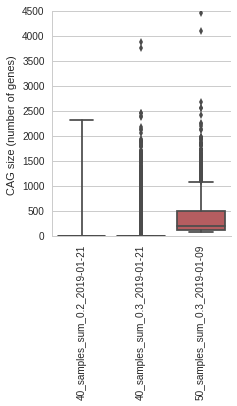

In [3]:
def compare_CAG_sizes_box(list_of_fps):
    """Compare the sizes of a list of multiple CAGs as box plot"""
    
    # Make a DataFrame with the sizes of each CAG from each file
    l = []
    
    for fp in list_of_fps:
        cag_sizes = read_CAG_size(fp)
        
        for cag_name, cag_size in cag_sizes.items():
            
            l.append({
                    "file_name": fp.replace('.cags.json.gz', ''),
                    "cag_name": cag_name,
                    "cag_size": cag_size
                })
            
    df = pd.DataFrame(l)
    
    g = sns.factorplot(data=df, x="file_name", y="cag_size",kind="box")
    g.set_xticklabels(rotation=90)
    g.set_xlabels("")
    g.set_ylabels("CAG size (number of genes)")
    plt.show()

compare_CAG_sizes_box([
    "40_samples_sum_0.2_2019-01-21.cags.json.gz",
    "40_samples_sum_0.3_2019-01-21.cags.json.gz",
    "50_samples_sum_0.3_2019-01-09.cags.json.gz"
])
    

In [5]:
def compare_CAG_sizes_cdf(list_of_fps):
    """Compare the sizes of a list of multiple CAGs as box plot"""
    
    # Make a DataFrame with the sizes of each CAG from each file
    l = []
    
    for fp in list_of_fps:
        cag_sizes = read_CAG_size(fp)
        
        for cag_name, cag_size in cag_sizes.items():
            
            l.append({
                    "file_name": fp.replace('.cags.json.gz', ''),
                    "cag_name": cag_name,
                    "cag_size": cag_size
                })
            
    df = pd.DataFrame(l)
    print(df)
compare_CAG_sizes_cdf([
    "40_samples_sum_0.2_2019-01-21.cags.json.gz",
    "40_samples_sum_0.3_2019-01-21.cags.json.gz",
    "50_samples_sum_0.3_2019-01-09.cags.json.gz"
])
#do something with groupby?

       cag_name  cag_size                      file_name
0        528735         1  40_samples_sum_0.2_2019-01-21
1        511167         1  40_samples_sum_0.2_2019-01-21
2        780868         1  40_samples_sum_0.2_2019-01-21
3        159026         1  40_samples_sum_0.2_2019-01-21
4        695883         1  40_samples_sum_0.2_2019-01-21
5         16900         2  40_samples_sum_0.2_2019-01-21
6        547084         1  40_samples_sum_0.2_2019-01-21
7        659077         1  40_samples_sum_0.2_2019-01-21
8        489986         1  40_samples_sum_0.2_2019-01-21
9        311827         1  40_samples_sum_0.2_2019-01-21
10       165055         1  40_samples_sum_0.2_2019-01-21
11       245475         1  40_samples_sum_0.2_2019-01-21
12       288059         1  40_samples_sum_0.2_2019-01-21
13       491264         1  40_samples_sum_0.2_2019-01-21
14       278714         1  40_samples_sum_0.2_2019-01-21
15       372860         1  40_samples_sum_0.2_2019-01-21
16       165678         1  40_s

In [42]:
def compare_CAG_sizes_box(list_of_fps):
    """Compare the sizes of a list of multiple CAGs as box plot"""
    
    # Make a DataFrame with the sizes of each CAG from each file
    df = []
    
    for fp in list_of_fps:
        cag_sizes = read_CAG_size(fp)
        
        for cag_name, cag_size in cag_sizes.items():
            
            df.append({
                    "file_name": fp.replace('.cags.json.gz', ''),
                    "cag_name": cag_name,
                    "cag_size": cag_size
                })
            
    df = pd.DataFrame(df)
    df=df.sort_values(by='cag_size', ascending=False)
    num_bins = 20
    counts, bin_edges = np.histogram (cag_size, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bin_edges[1:], cdf/cdf[-1])

    plt.show()
    #return df
    
compare_CAG_sizes_box([
    "40_samples_sum_0.2_2019-01-21.cags.json.gz",
    "40_samples_sum_0.3_2019-01-21.cags.json.gz",
    "50_samples_sum_0.3_2019-01-09.cags.json.gz"
])


NameError: name 'np' is not defined

In [ ]:
sorted_data = np.sort(df)

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals)

plt.show()

compare_CAG_sizes_cdc([
    "40_samples_sum_0.2_2019-01-21.cags.json.gz",
    "40_samples_sum_0.3_2019-01-21.cags.json.gz",
    "50_samples_sum_0.3_2019-01-09.cags.json.gz"
])

In [8]:
counter = defaultdict(int)

count = 1
for x in ['a', 'b', 'c']:
    counter[(x, 'SECOND_ITEM')] += count
    count += 1


print("Done with step A")
print(counter)
print("")

#is this a different counter? 
counter=pd.Series(counter).sort_values(ascending=False)

print("Done with step B")
print(counter)
print("")

print("Running step C")
for tuple_key, value in counter.items():
    item1, item2 = tuple_key
    print("Item 1: {}".format(item1))
    print("Item 2: {}".format(item2))
    print("Value: {}".format(value))
    print("moving on to the next iteration in the loop\n") #/n means new line

Done with step A
defaultdict(<class 'int'>, {('c', 'SECOND_ITEM'): 3, ('b', 'SECOND_ITEM'): 2, ('a', 'SECOND_ITEM'): 1})

Done with step B
c  SECOND_ITEM    3
b  SECOND_ITEM    2
a  SECOND_ITEM    1
dtype: int64

Running step C
Item 1: c
Item 2: SECOND_ITEM
Value: 3
moving on to the next iteration in the loop

Item 1: b
Item 2: SECOND_ITEM
Value: 2
moving on to the next iteration in the loop

Item 1: a
Item 2: SECOND_ITEM
Value: 1
moving on to the next iteration in the loop



In [83]:
#unrelated, testing out how diff parts work

def read_json_gz(fp):
    return json.load(gzip.open(fp, "rt"))

cags=read_json_gz("40_samples_sum_0.2_2019-01-21.cags.json.gz")
#from pandas.io.json import json_normalize
#print json_normalize('40_samples_sum_0.2_2019-01-21.cags.json.gz')


def read_CAG_size(fp):
    #cags = read_json_gz(fp)
    
    cag_sizes = {}
    
    for cag_name, list_of_genes_in_cag in cags.items():
        number_of_genes_in_cag = len(list_of_genes_in_cag)
        cag_sizes[cag_name] = number_of_genes_in_cag
    
    return cag_sizes
    
    
read_CAG_size("40_samples_sum_0.2_2019-01-21.cags.json.gz")


    

{'774823': 1,
 '600882': 1,
 '634865': 1,
 '793878': 1,
 '617386': 1,
 '942744': 1,
 '82178': 1,
 '17897': 2,
 '562317': 1,
 '636094': 1,
 '266359': 1,
 '1433': 40,
 '938291': 1,
 '21643': 2,
 '117739': 1,
 '841031': 1,
 '565491': 1,
 '260893': 1,
 '10231': 2,
 '770028': 1,
 '942823': 1,
 '64628': 1,
 '586460': 1,
 '83738': 1,
 '588573': 1,
 '738884': 1,
 '517578': 1,
 '311673': 1,
 '1742': 33,
 '333170': 1,
 '36446': 1,
 '777427': 1,
 '244567': 1,
 '195543': 1,
 '629493': 1,
 '927181': 1,
 '917997': 1,
 '16986': 3,
 '943035': 1,
 '760285': 1,
 '548782': 1,
 '127501': 1,
 '716780': 1,
 '59191': 1,
 '242299': 1,
 '766069': 1,
 '100869': 1,
 '542830': 1,
 '533483': 1,
 '206880': 1,
 '117407': 1,
 '233081': 1,
 '48843': 1,
 '389610': 1,
 '588369': 1,
 '608800': 1,
 '62162': 1,
 '446791': 1,
 '505263': 1,
 '27473': 2,
 '1566': 38,
 '751137': 1,
 '737642': 1,
 '151226': 1,
 '17975': 2,
 '468321': 1,
 '446821': 1,
 '219353': 1,
 '392044': 1,
 '426229': 1,
 '880016': 1,
 '96114': 1,
 '497780'